# Upper Confidence Bound (UCB)

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

## Importing the dataset

In [ ]:
dataset = pd.read_csv('/content/Ads_CTR_Optimisation.csv')

## Implementing UCB

In [ ]:
N = 5000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0  
for n in range(0, N):
  ad = 0
  max_upper_bound = 0
  for i in range(0, d):
    if numbers_of_selections[i] > 0:
      average_reward = sums_of_rewards[i] / numbers_of_selections[i]
      delta_i = math.sqrt((3/2) * math.log(n +1) / numbers_of_selections[i])
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400
    if upper_bound > max_upper_bound:
      max_upper_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  numbers_of_selections[ad] = numbers_of_selections[ad] + 1
  reward = dataset.values[n, ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward
  total_reward = total_reward + reward


## Visualising the results

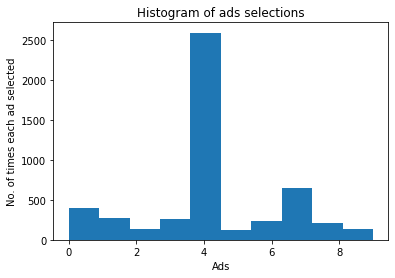

In [ ]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('No. of times each ad selected')
plt.show()

In the histogram, we can see that ad number 5 has the highest click through rate. We can change the value of N, and can check if the UCB algorithm is still able to find the ad number 5 with highest CTR. We will try to vary N by reducing it and will check if UCB is able to give right result with less iterations over the users.